Please copy the notebook to your drive and write your code in it.

Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read Dataset from csv file

In [ ]:
 iris= pd.read_csv('/content/Iris.csv')

Preview dataset

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Declare feature vector and target variable

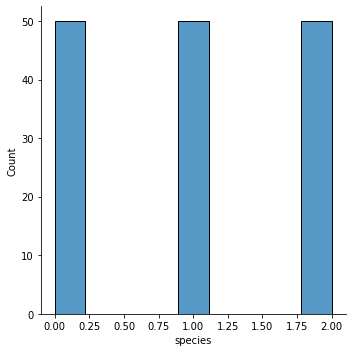

In [ ]:
from sklearn.preprocessing import LabelEncoder
species = LabelEncoder()
iris['species'] = species.fit_transform(iris.iloc[:,-1])
iris = iris.drop("Species",axis = 'columns')
features = iris.iloc[:,1:-1]
target = iris.iloc[:,-1]
sns.displot(target)

Replace categorical data with numbers

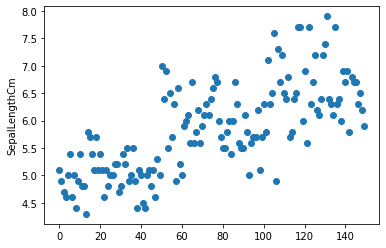

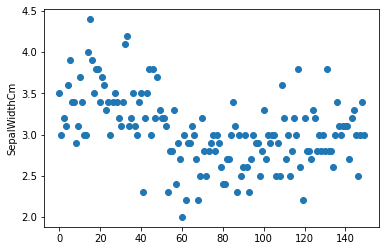

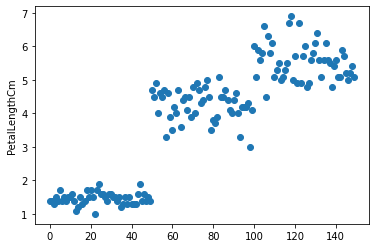

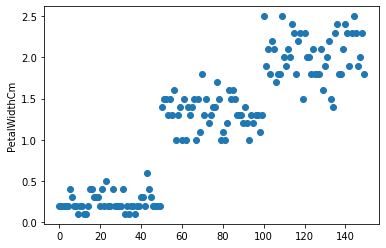

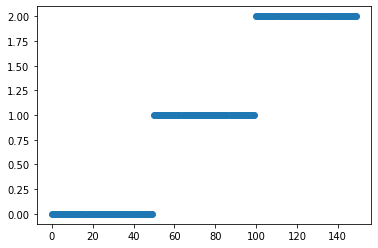

In [ ]:
# visualisation features 
for i in features.keys():
  plt.scatter(x = features.index,y = features.loc[:,i])
  plt.ylabel(f'{i}')
  plt.show()
plt.scatter(x = target.index,y = target)
plt.show()

Split data into train and test sets

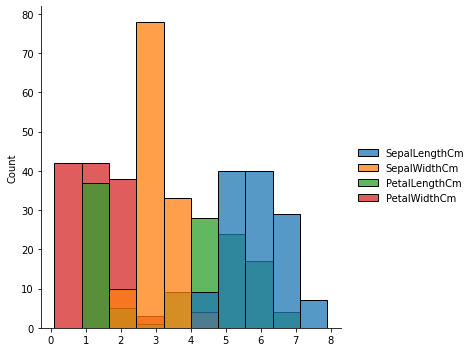

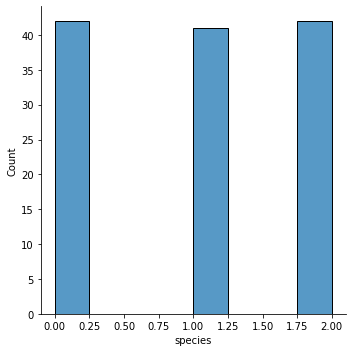

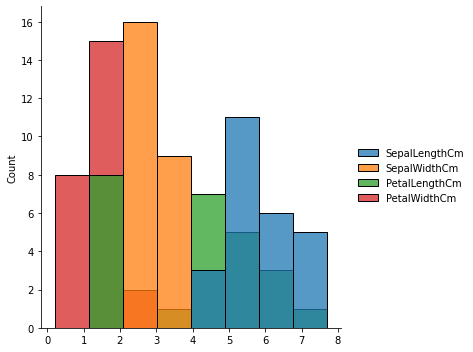

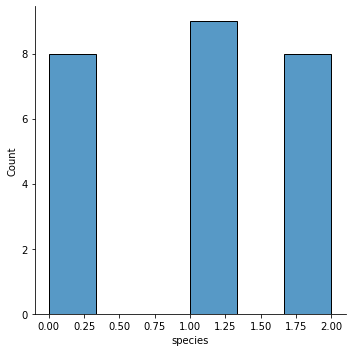

(25,)
(25, 4)
(125,)
(125, 4)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
x_train,x_test,y_train,y_test = train_test_split(features,target,shuffle= True,train_size=125)

# x_train,x_test,y_train,y_test = train_test_split(features,label_binarize(target,classes = np.unique(target)),shuffle= False,train_size=125)
sns.displot(x_train)
plt.show()
sns.displot(y_train)
plt.show()
sns.displot(x_test)
plt.show()
sns.displot(y_test)
plt.show()
print(y_test.shape)
print(x_test.shape)
print(y_train.shape)
print(x_train.shape)

Base estimator(Decision Tree classifier) : a weak learner with max_depth=2

In [ ]:
from sklearn.tree import DecisionTreeClassifier
baseTree = DecisionTreeClassifier(max_depth = 2)

Fit weak classifier

In [ ]:
baseTree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Calculate the accuracy by the weak learner

In [ ]:
print(baseTree.score(x_test,y_test))

0.88


Build the AdaBoost model with the the above decision tree and by increasing the number of trees from 1 to 5 with a step of 1 in the lines:

Hint:   
estimators = list(range(1, 5, 1))
for n_est in estimators:



model with 10 estimators performs :  0.96


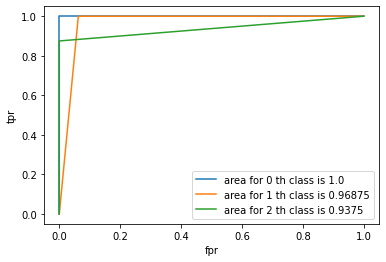

model with 20 estimators performs :  0.92


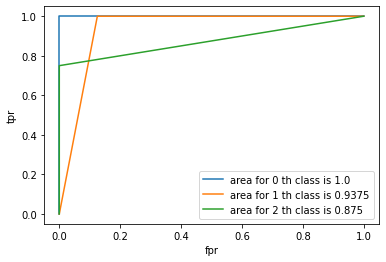

model with 30 estimators performs :  0.92


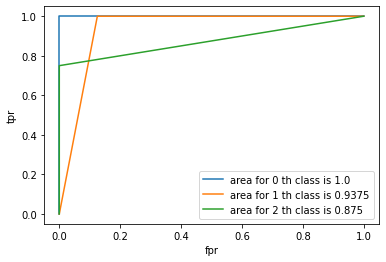

model with 40 estimators performs :  0.96


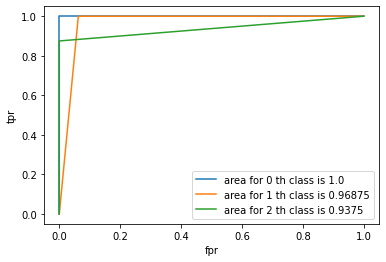

model with 50 estimators performs :  0.96


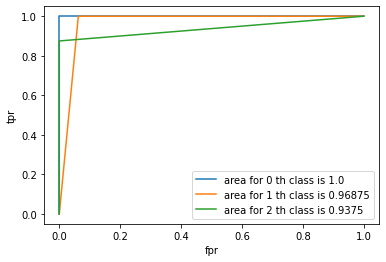

model with 60 estimators performs :  0.92


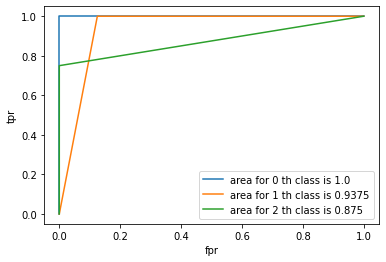

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve,auc
estimators = list(range(10,70,10))

for i in estimators:
  model = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=2),n_estimators = i)
  model.fit(x_train,y_train)
  print(f"model with {i} estimators performs : ", model.score(x_test,y_test))
  binar1 = label_binarize(np.array(y_test),classes = np.unique(target))
  binar2 = label_binarize(np.array(model.predict(x_test)),classes = np.unique(target))
  n_classes = binar1.shape[1]
  fpr = dict()
  tpr = dict()
  auc_ = dict()
  for i in range(n_classes):
    fpr[i],tpr[i] ,_ = roc_curve(binar1[:,i],binar2[:,i])
    auc_[i] = auc(fpr[i],tpr[i])
  for i in range(n_classes):
    plt.plot(fpr[i],tpr[i],label = f'area for {i} th class is {auc_[i]}')
    plt.legend()
    plt.xlabel('fpr')
    plt.ylabel('tpr')
  plt.show()

Plot the model performance

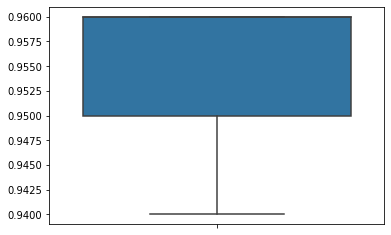

0.9533333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


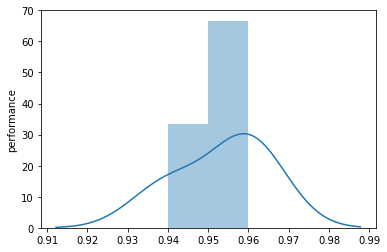

In [ ]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
a = cross_val_score(model,features,target,cv=3)
sns.boxplot(y = a)
plt.show()
sns.distplot(a)
plt.ylabel("performance")
print(a.mean())

#Bayes Classfication

Import modules

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
# clf = BernoulliNB(alpha=3,binarize=2)

Naive Bayes algorithm using 5-fold cross validation 

overall mean accuracy is :  0.9533333333333334


Text(0, 0.5, 'scores of cv')

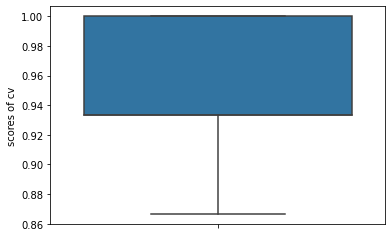

In [ ]:
scores = cross_val_score(clf,features,target,cv = 10)
print("overall mean accuracy is : ", np.array(scores).mean())
sns.boxplot(y = scores)
plt.ylabel("scores of cv")


Plot the ROC AUC curve

In [ ]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,plot_roc_curve
clf.fit(x_train,y_train)
a = clf.predict(x_test)
print('score is : ',clf.score(x_test,y_test))
# roc_curve(y_true=y_test,y_score = clf.predict(x_test))
print(confusion_matrix(y_test,clf.predict(x_test)))
# print(np.array(y_test))
# print(clf.predict(x_test))
print(roc_auc_score(np.array(y_test),clf.predict_proba(x_test),multi_class='ovr'))

score is :  0.92
[[8 0 0]
 [0 8 1]
 [0 1 7]]
0.9904684095860566


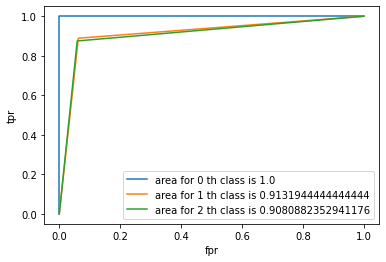

In [ ]:
from sklearn.preprocessing import binarize
binar1 = label_binarize(np.array(y_test),classes = np.unique(target))
binar2 = label_binarize(np.array(a),classes = np.unique(target))
n_classes = binar1.shape[1]
fpr = dict()
tpr = dict()
auc_ = dict()
for i in range(n_classes):
  fpr[i],tpr[i] ,_ = roc_curve(binar1[:,i],binar2[:,i])
  auc_[i] = auc(fpr[i],tpr[i])
for i in range(n_classes):
  plt.plot(fpr[i],tpr[i],label = f'area for {i} th class is {auc_[i]}')
  plt.legend()
  plt.xlabel('fpr')
  plt.ylabel('tpr')

Use logarithmic discriminant function to compute accuracy

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_dis = LinearDiscriminantAnalysis(n_components=1)
clf_dis.fit(x_train,y_train)

clf_dis.score(x_test,y_test)
# clf_dis.predict_proba(x_test)

0.96

Bayes risk

overall risk for the test data set for all features ::  [12.0, 12.0, 16.684063760712654, 17.93201626966789, 15.227543001391473, 17.902267553475593, 15.000359503826154, 17.999999998866357, 17.358134595118706, 12.0, 17.99999999998348, 15.925611922650551, 15.000232081228903, 12.0, 15.000272990931121, 17.999970319466144, 12.000000000000085, 15.000026810518733, 12.0, 16.077053968302938, 15.000065602900339, 12.000000000000007, 17.999995010979426, 15.003745957861131, 12.000000000024954]
plotting the risk for each xi in the test dataset 


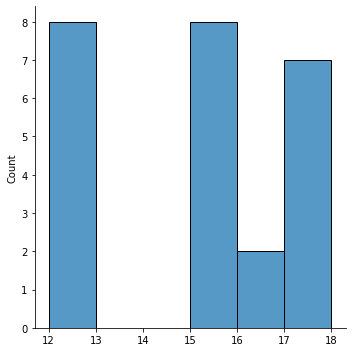

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


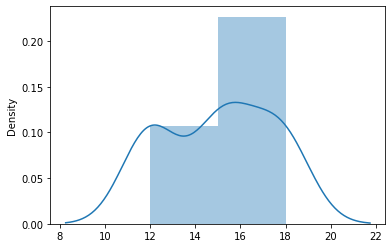

In [ ]:
lambda_mat = [[1,2,3],[4,5,6],[7,8,9]]#loss matrix
# use predict_proba here and calculate risk using this
risk = []
for i , j , k in clf.predict_proba(x_test):
  risk.extend([[i*lambda_mat[t][0]+j*lambda_mat[t][1]+k*lambda_mat[t][2] for t in range(3)]])
for i in range(len(risk)):
  risk[i] = sum(risk[i])
print('overall risk for the test data set for all features :: ', risk)
print('plotting the risk for each xi in the test dataset ')
sns.displot(risk)
plt.show()
sns.distplot(risk)

In [ ]:
# take any one feature
feat_ure = np.array(iris.iloc[:,4])

Text(0.5, 0, 'PetalWidthCm')

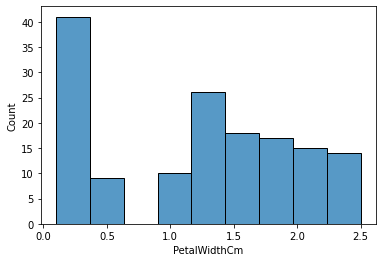

In [ ]:
sns.histplot(feat_ure)
plt.xlabel(f'{iris.keys()[-2]}')

In [ ]:
a,b = np.unique(iris.iloc[:,-1],return_counts=True)
print(a)
print(b)

[0 1 2]
[50 50 50]


0.3333333333333333 0.3333333333333333 0.3333333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


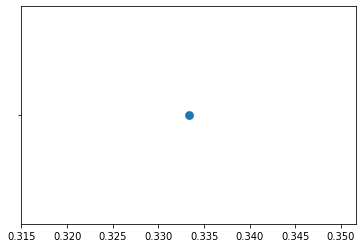

In [ ]:
prob_class1 = b[0]/sum(b)
prob_class2 = b[1]/sum(b)
prob_class3 = b[2]/sum(b)
print(prob_class1 , prob_class2,prob_class3)#equiprobable classes
sns.pointplot([prob_class1 , prob_class2, prob_class3])

In [ ]:
l0 = iris.loc[iris.species == 0,'PetalWidthCm']
l1 = iris.loc[iris.species == 1,'PetalWidthCm']
l2 = iris.loc[iris.species == 2,'PetalWidthCm']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

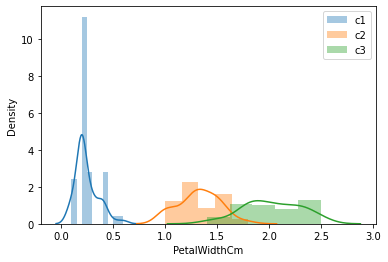

In [ ]:
sns.distplot(l0,label = 'c1')
sns.distplot(l1,label = 'c2')
sns.distplot(l2,label = 'c3')
plt.legend()
plt.show()

In [ ]:
from collections import Counter
count1_dict = Counter(l0)
count2_dict = Counter(l1)
count3_dict = Counter(l2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


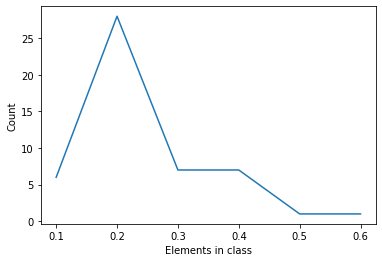

In [ ]:
count1_dict_keys = list(count1_dict.keys())
count1_dict_values = np.array(list(count1_dict.values()))
sns.lineplot(count1_dict_keys,count1_dict_values)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


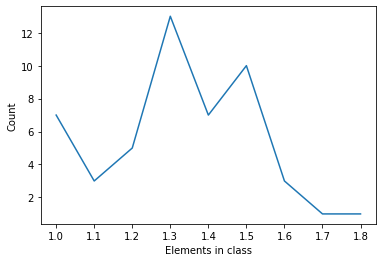

In [ ]:
count2_dict_keys = list(count2_dict.keys())
count2_dict_values = np.array(list(count2_dict.values()))
sns.lineplot(count2_dict_keys,count2_dict_values)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


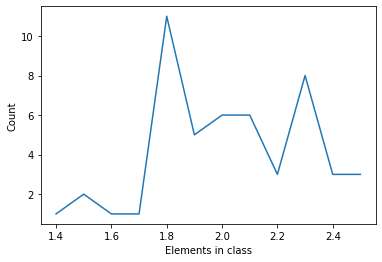

In [ ]:
count3_dict_keys = list(count3_dict.keys())
count3_dict_values = np.array(list(count3_dict.values()))
sns.lineplot(count3_dict_keys,count3_dict_values)
plt.xlabel("Elements in class")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


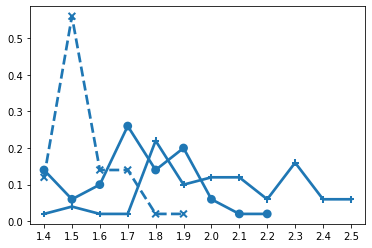

In [ ]:
like_c1 = count1_dict_values/b[0]
like_c2 = count2_dict_values/b[1]
like_c3 = count3_dict_values/b[2]
sns.pointplot(count1_dict_keys,like_c1, linestyles="--",markers =['x'] )

sns.pointplot(count2_dict_keys,like_c2, linestyles="solid",markers =['o'] )

sns.pointplot(count3_dict_keys,like_c3, linestyles="-",markers =['+'] )

In [ ]:
post_c1 = like_c1*prob_class1
post_c2 = like_c2*prob_class2
post_c3 = like_c3*prob_class3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

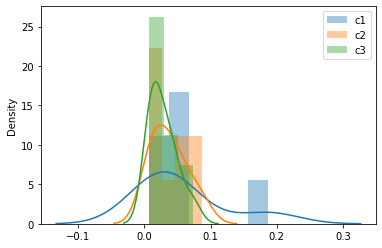

In [ ]:
sns.distplot(post_c1,label='c1')
sns.distplot(post_c2,label='c2')
sns.distplot(post_c3,label='c3')
plt.legend()
plt.show()

QUE 3


In [ ]:
q3 = pd.read_csv('/content/Data.csv')

In [ ]:
q3.head()

,Height,Price
0,1.0,550
1,3.0,566
2,4.0,558
3,3.0,784
4,5.0,333


In [ ]:
q3.shape

(27, 2)

In [ ]:
q3['labels'] = (q3.iloc[:,1]>550).astype('int')
count = np.unique(q3.labels,return_counts=True)[1] 
print('0count ',count[0])
print('1count ',count[1])

0count  4
1count  23


In [ ]:
c1 = np.array(q3.loc[q3.labels==0,'Height'])
c1

array([1. , 5. , 3. , 2.5])

In [ ]:
c2 = np.array(q3.loc[q3.labels==1,'Height'])
c2

array([3. , 4. , 3. , 2. , 3. , 3. , 2. , 1. , 3. , 2. , 2. , 1. , 1.5,
       2.5, 1.5, 1.5, 3. , 1.5, 1. , 2.5, 1. , 1.5, 1. ])

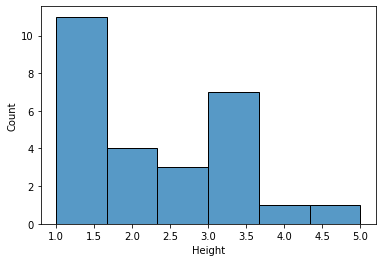

In [ ]:
import seaborn as sns
sns.histplot(q3.iloc[:,0])

In [ ]:
c1_prob = count[0]/(count[0]+count[1])
c2_prob = count[1]/(count[0]+count[1])
print(c1_prob,c2_prob)

0.14814814814814814 0.8518518518518519


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


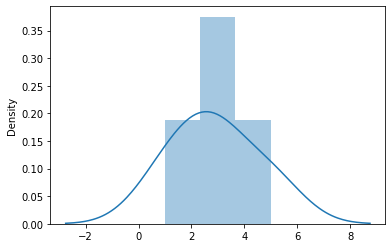

In [ ]:
# p(ht/0)
sns.distplot(c1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


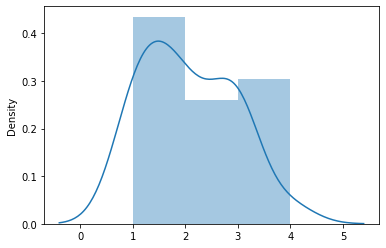

In [ ]:
sns.distplot(c2)

In [ ]:
from collections import Counter
c1_unique = Counter(c1)
c2_unique = Counter(c2)

In [ ]:
c1_unique

Counter({1.0: 1, 2.5: 1, 3.0: 1, 5.0: 1})

In [ ]:
c2_unique

Counter({1.0: 5, 1.5: 5, 2.0: 4, 2.5: 2, 3.0: 6, 4.0: 1})

In [ ]:
prob_c1 = np.array(list(c1_unique.values()))/count[0]
prob_c2 = np.array(list(c2_unique.values()))/count[1]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


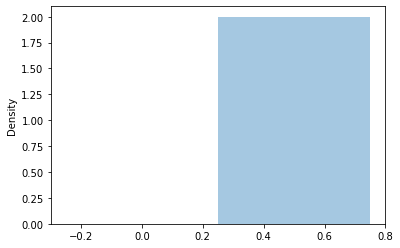

In [ ]:
prob_c1
sns.distplot(prob_c1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


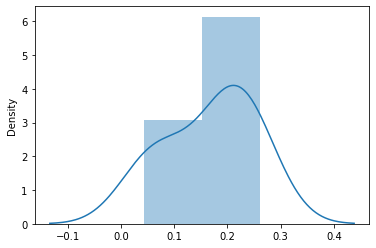

In [ ]:
prob_c2
sns.distplot(prob_c2)

In [ ]:
posterior_c1 = c1_prob*prob_c1

In [ ]:
posterior_c2 = c2_prob*prob_c2

In [ ]:
posterior_c1

array([0.03703704, 0.03703704, 0.03703704, 0.03703704])

In [ ]:
posterior_c2

array([0.22222222, 0.03703704, 0.14814815, 0.18518519, 0.18518519,
       0.07407407])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


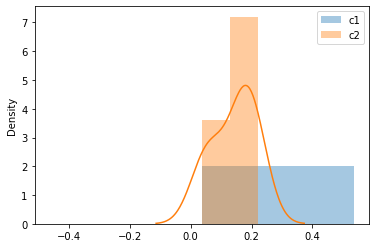

In [ ]:
sns.distplot(posterior_c1,label='c1')
sns.distplot(posterior_c2,label='c2')
plt.legend()
plt.show()

In [ ]:
c_1 = pd.read_csv('/content/c1')
c_2 = pd.read_csv('/content/c2')

In [ ]:
c_1.head()

,x1,x2
0,0.320478,0.481092
1,0.050691,0.096400
2,3.748470,0.403931
3,2.256374,2.089962
4,1.421454,1.243629


In [ ]:
c_1.shape

(160, 2)

In [ ]:
c_2.head()

,x1,x2
0,-0.779019,1.163869
1,-1.345146,-2.323707
2,-0.528361,-1.594005
3,-0.904174,-1.306116
4,-1.019487,-1.336907


In [ ]:
c_2.shape

(39, 2)

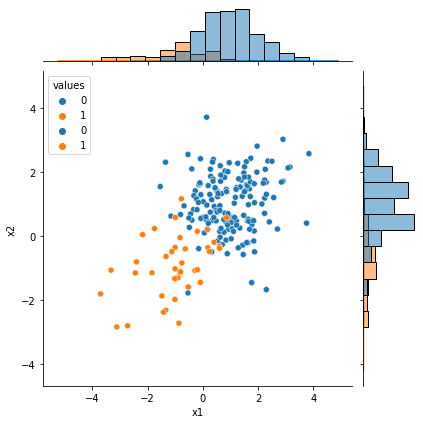

In [ ]:
c_1['values'] = np.zeros(shape = (len(c_1),),dtype= int)
c_2['values'] = np.ones(shape = (len(c_2),),dtype = int)
df_final = pd.concat([c_1,c_2],ignore_index=True)
g = sns.jointplot(data = df_final,x='x1',y='x2',hue='values')
g.plot(sns.scatterplot,sns.histplot)

In [ ]:
c1_prob = c_1.shape[0]/(c_1.shape[0]+c_2.shape[0])
c2_prob = c_2.shape[0]/(c_1.shape[0]+c_2.shape[0])
print(c1_prob)
print(c2_prob)

0.8040201005025126
0.19597989949748743


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


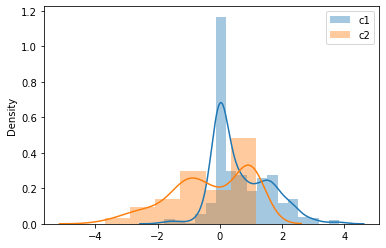

In [ ]:
sns.distplot(c_1,label='c1')
sns.distplot(c_2,label='c2')
plt.legend()

In [ ]:
#chossing first column feature and doing the analysis
unique_c1 = Counter(c_1.iloc[:,0].to_numpy())
c1_keys = unique_c1.keys()
c1_values = np.array(list(unique_c1.values()))

unique_c2 = Counter(c_2.iloc[:,0].to_numpy())
c2_keys = unique_c2.keys()
c2_values = np.array(list(unique_c2.values()))

In [ ]:
likelihood_c1 = c1_values/c_1.shape[0]
likelihood_c2 = c2_values/c_2.shape[0]

In [ ]:
likelihood_c1

array([0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625,
       0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625,
       0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625,
       0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625,
       0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625,
       0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625,
       0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625,
       0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625,
       0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625,
       0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625,
       0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625,
       0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625,
       0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625,
       0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625, 0.00625,
       0.00625, 0.00

In [ ]:
likelihood_c2

array([0.02564103, 0.02564103, 0.02564103, 0.02564103, 0.02564103,
       0.02564103, 0.02564103, 0.02564103, 0.02564103, 0.02564103,
       0.02564103, 0.02564103, 0.02564103, 0.02564103, 0.02564103,
       0.02564103, 0.02564103, 0.02564103, 0.02564103, 0.02564103,
       0.02564103, 0.02564103, 0.02564103, 0.02564103, 0.02564103,
       0.02564103, 0.02564103, 0.02564103, 0.02564103, 0.02564103,
       0.02564103, 0.02564103, 0.02564103, 0.02564103, 0.02564103,
       0.02564103, 0.02564103, 0.02564103, 0.02564103])

In [ ]:
likelihood_c1 *= c1_prob
likelihood_c2 *= c2_prob

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


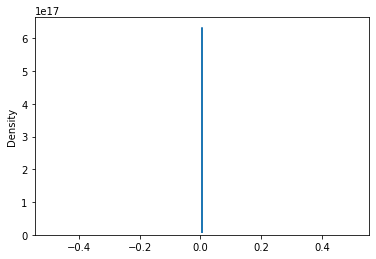

In [ ]:
sns.distplot(likelihood_c1)

In [ ]:
posterior_c1 = likelihood_c1
posterior_c2 = likelihood_c2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


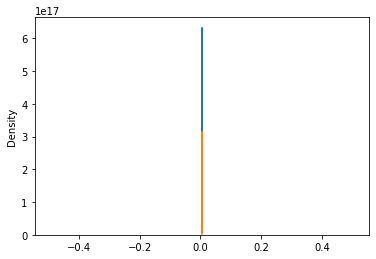

In [ ]:
sns.distplot(posterior_c1)
sns.distplot(posterior_c2)
